In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
#read the dataset
data=pd.read_csv("Churn_Modelling.csv")
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Surname"]=le.fit_transform(data["Surname"])
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])
data["Tenure"]=le.fit_transform(data["Tenure"])
data["Balance"]=le.fit_transform(data["Balance"])
data["NumOfProducts"]=le.fit_transform(data["NumOfProducts"])
data["HasCrCard"]=le.fit_transform(data["HasCrCard"])
data["IsActiveMember"]=le.fit_transform(data["IsActiveMember"])
data["EstimatedSalary"]=le.fit_transform(data["EstimatedSalary"])
data["Exited"]=le.fit_transform(data["Exited"])
data.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1822          850          2       0   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0              1          0               0             4704   
4       2     3696              0          1               1             3925   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [ ]:
x=data.iloc[:,0:13].values
y=data.iloc[:,13:14].values
x

array([[       1, 15634602,     1115, ...,        1,        1,     5068],
       [       2, 15647311,     1177, ...,        0,        1,     5639],
       [       3, 15619304,     2040, ...,        1,        0,     5707],
       ...,
       [    9998, 15584532,     1570, ...,        0,        1,     2062],
       [    9999, 15682355,     2345, ...,        1,        0,     4639],
       [   10000, 15628319,     2751, ...,        1,        0,     1878]])

In [ ]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a=one.fit_transform(x[:,6:7]).toarray()
b=one.fit_transform(x[:,7:8]).toarray()
c=one.fit_transform(x[:,8:9]).toarray()
d=one.fit_transform(x[:,9:10]).toarray()
e=one.fit_transform(x[:,10:11]).toarray()
f=one.fit_transform(x[:,11:12]).toarray()
g=one.fit_transform(x[:,12:13]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,x),axis=1)









In [ ]:
#from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_resample,y_resample= smt.fit_resample(x,y)
x_resample

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.19000000e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.08000000e+02, 2.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.02000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.43714793e+02, 1.41426033e+00, 7.07130163e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.77516181e+02, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.46397581e+02, 1.00000000e+00, 1.30500850e-01]])

In [ ]:
y_resample
x.shape,x_resample.shape
y.shape,y_resample.shape

((10000, 1), (15926,))

In [ ]:
data.describe()

RowNumber    CustomerId       Surname   CreditScore     Geography  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07   1507.774200    650.528800      0.746300   
std     2886.89568  7.193619e+04    846.204311     96.653299      0.827529   
min        1.00000  1.556570e+07      0.000000    350.000000      0.000000   
25%     2500.75000  1.562853e+07    773.750000    584.000000      0.000000   
50%     5000.50000  1.569074e+07   1542.000000    652.000000      0.000000   
75%     7500.25000  1.575323e+07   2238.250000    718.000000      1.000000   
max    10000.00000  1.581569e+07   2931.000000    850.000000      2.000000   

             Gender           Age        Tenure       Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.545700     38.921800      5.012800   2036.788100       0.530200   
std        0.497932     10.487806      2.892174   2125.232536       0.581654   
min        0.000000     18.000000      0.000000      0.000000       0.000000   
25%        0.000000     32.000000      3.000000      0.000000       0.000000   
50%        1.000000     37.000000      5.000000   1383.500000       0.000000   
75%        1.000000     44.000000      7.000000   3882.250000       1.000000   
max        1.000000     92.000000     10.000000   6381.000000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100      4998.621200      0.203700  
std        0.45584        0.499797      2886.711202      0.402769  
min        0.00000        0.000000         0.000000      0.000000  
25%        0.00000        0.000000      2498.750000      0.000000  
50%        1.00000        1.000000      4998.500000      0.000000  
75%        1.00000        1.000000      7498.250000      0.000000  
max        1.00000        1.000000      9998.000000      1.000000

<ipython-input-20-fec8894554d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Tenure"])
<ipython-input-20-fec8894554d1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

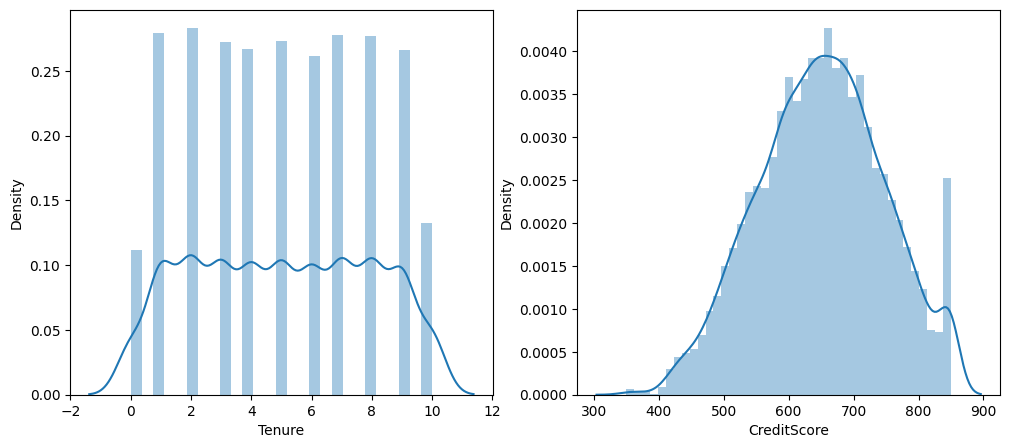

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["Tenure"])
plt.subplot(1,2,2)
sns.distplot(data["CreditScore"])

<Axes: ylabel='count'>

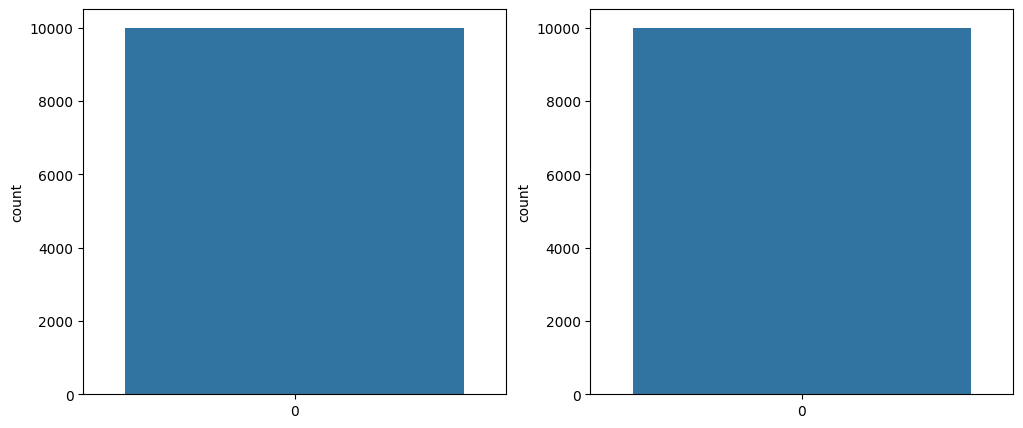

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["Gender"])
plt.subplot(1,2,2)
sns.countplot(data["EstimatedSalary"])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

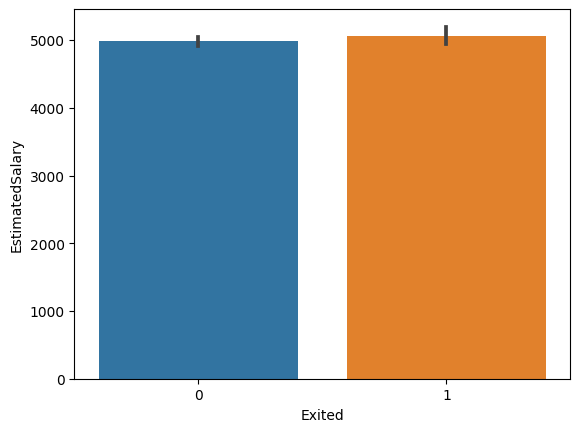

In [ ]:
sns.barplot(x="Exited",y="EstimatedSalary",data=data)

<Axes: >

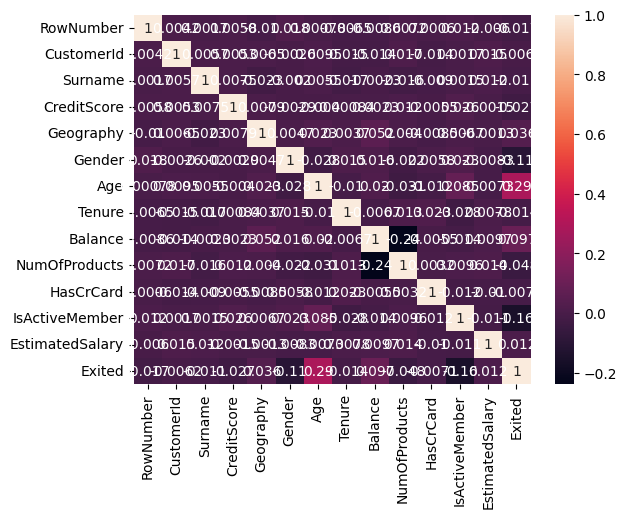

In [ ]:
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

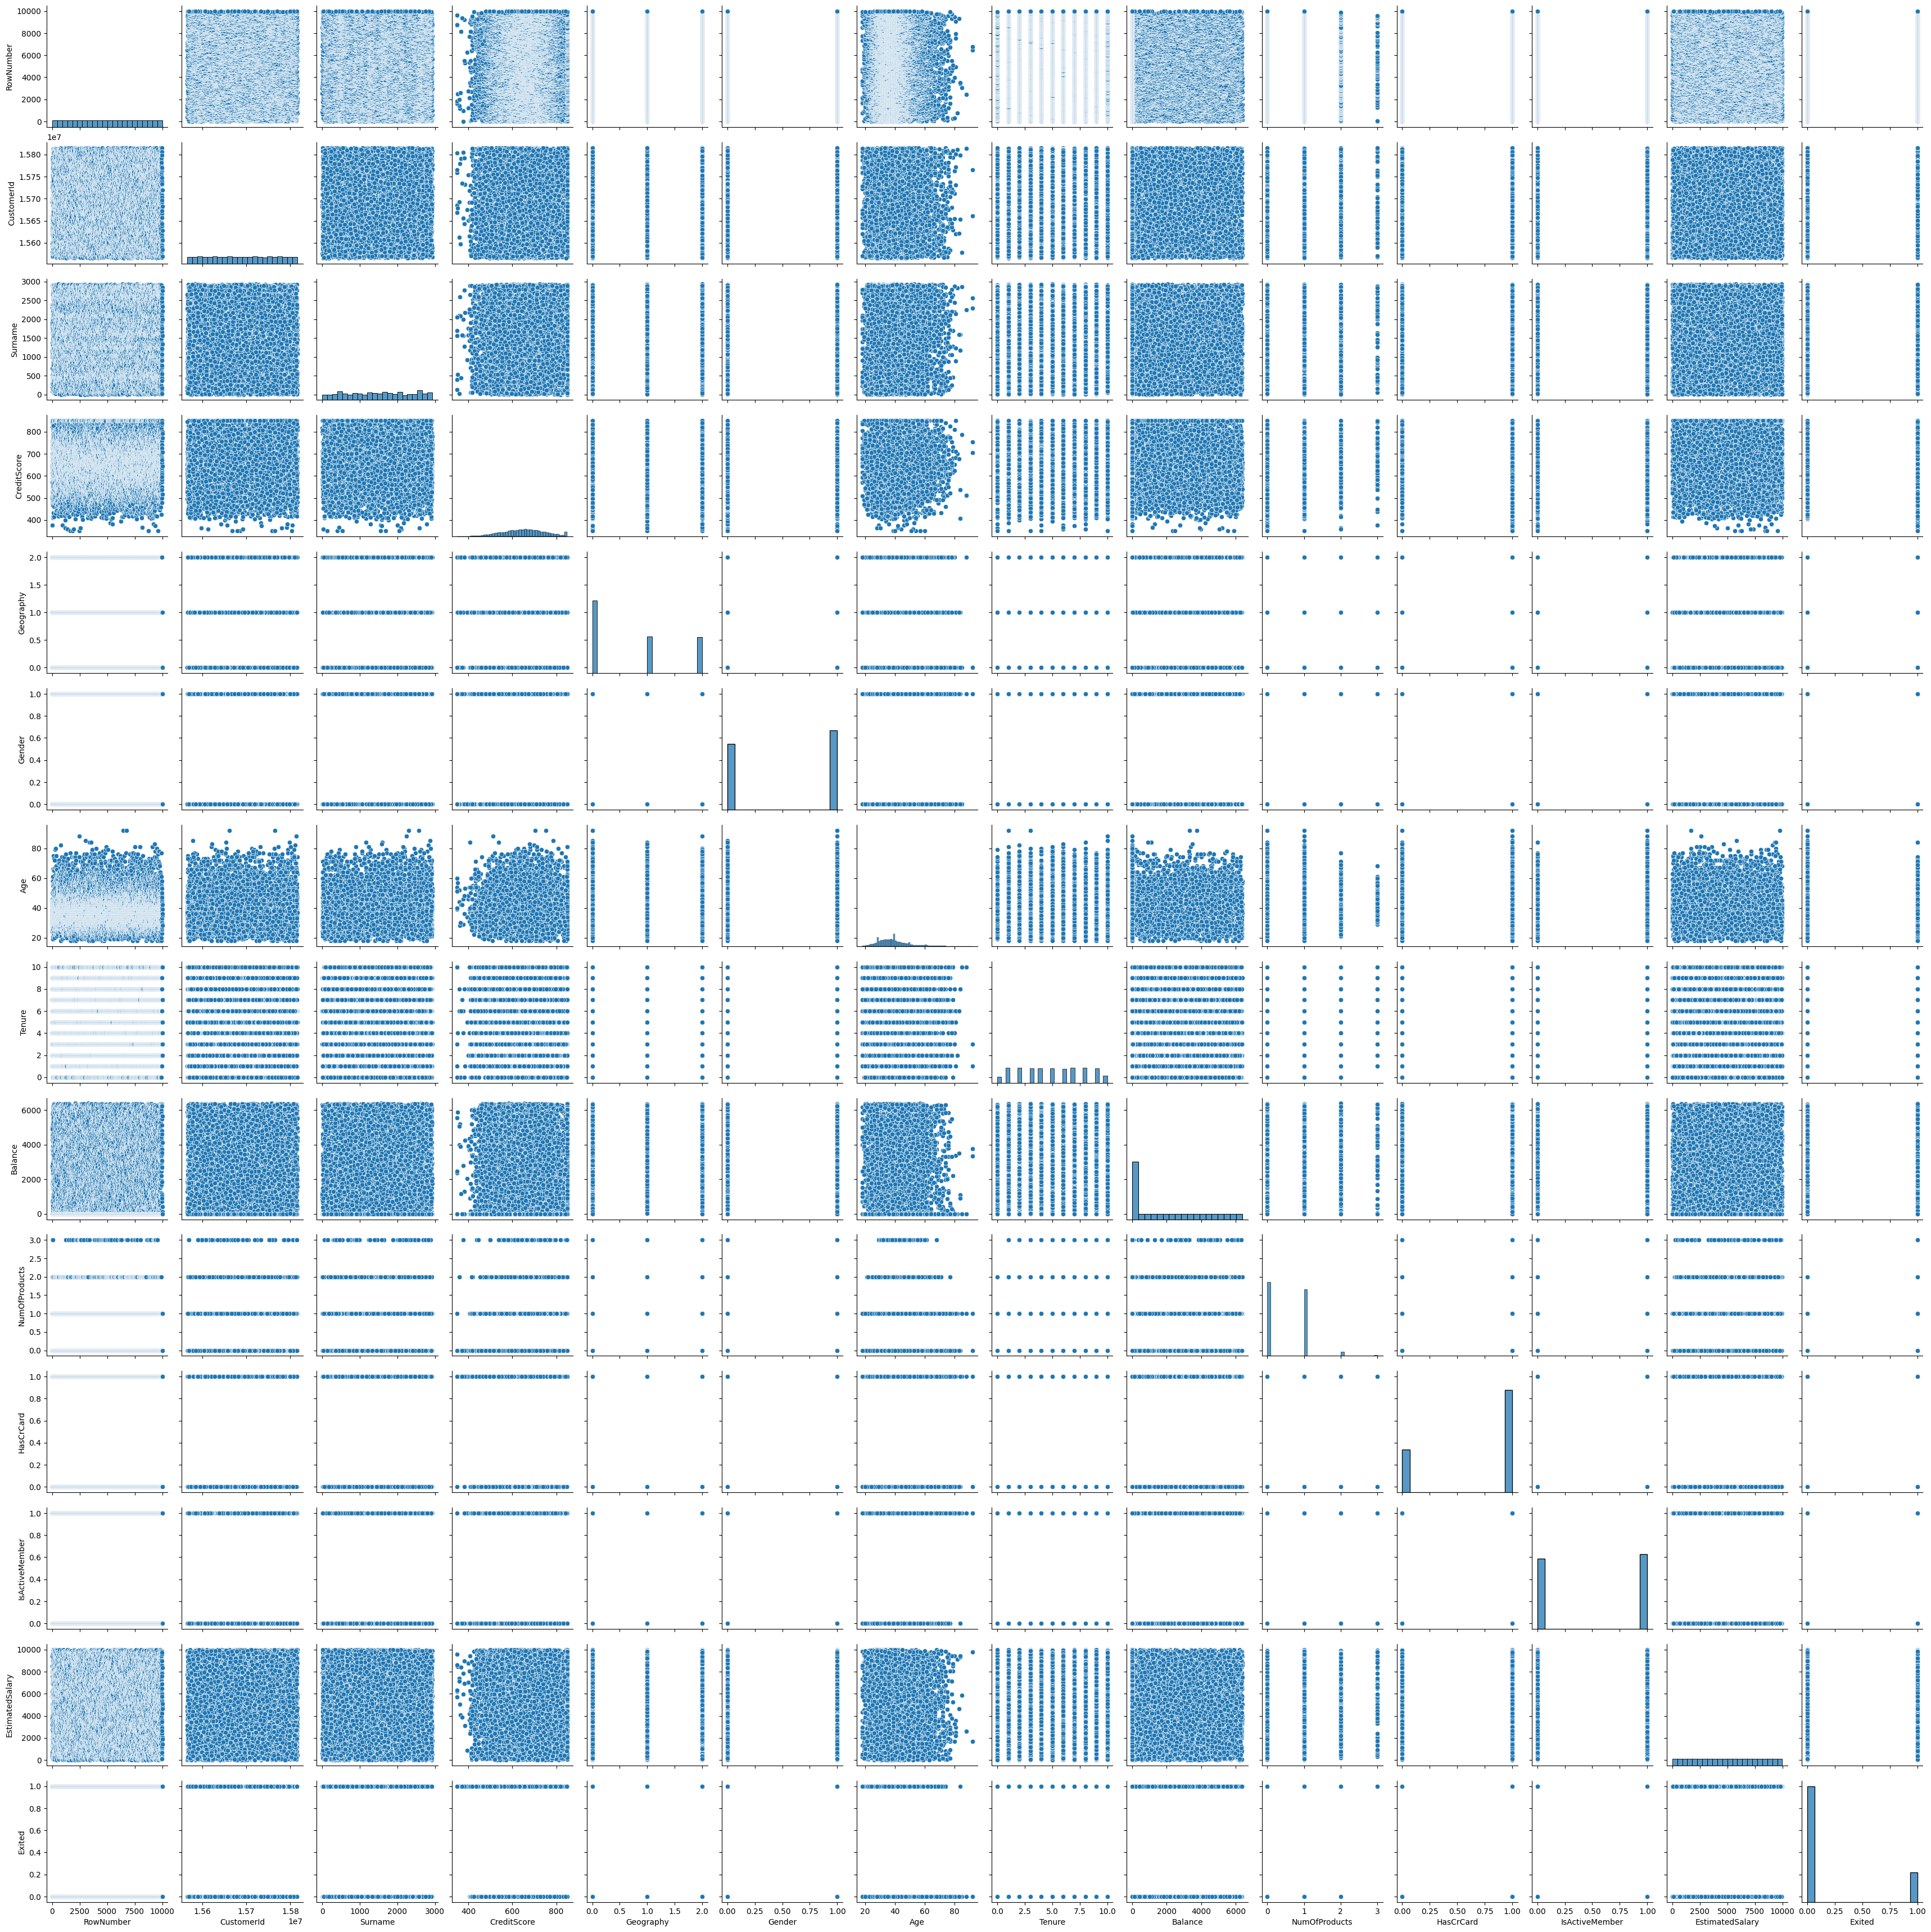

In [ ]:
sns.pairplot(data=data,markers=["^","v"],palette="interno")

In [ ]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.1,random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train.shape

(14333, 16476)

In [ ]:
def logreg(x_train,x_test,y_train,y_test):
  lr=LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr=lr.predict(x_train)
  print(accuracy_score(y_lr_tr,y_train))
  yPred_lr=lr.predict(x_test)
  print(accuracy_score(yPred_lr,y_test))
  print("***Logistic Regression***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_lr))
  print("Classification Report")
  print(classification_report(y_test,yPred_lr))
  logreg(x_train,x_test,y_train,y_test)

In [ ]:
def decisionTree(x_train,x_test,y_train,y_test):
  dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr=dtc.predict(x_train)
  print(accuracy_score(y_dt_tr,y_train))
  yPred_dt=dtc.predict(x_test)
  print(accuracy_score(yPred_dt,y_test))
  print("***Desicion Tree***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_dt))
  print("Classification Report")
  print(classification_report(y_test,yPred_dt))
  decisionTree(x_train,x_test,y_train,y_test)


In [ ]:
def RandomForest(x_train,x_test,y_train,y_test):
  rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr=rf.predict(x_train)
  print(accuracy_score(y_rf_tr,y_train))
  yPred_rf=rf.predict(x_test)
  print(accuracy_score(yPred_rf,y_test))
  print("***  Random Forest***")
  print("Confusion Matrix")
  print(confusion_matrix(y_test,yPred_rf))
  print("Classification Report")
  print(classification_report(y_test,yPred_rf))
  RandomForest(x_train,y_test,y_train,y_test)

In [ ]:
def KNN(x_train,x_test,y_train,y_test):
  knn=KNeighborsClassifier()
  knn.fit(x_train,y_train)
  y_knn_tr=knn.predict(x_train)
  print(accuracy_score(y_knn_tr,y_train))
  yPred_knn=knn.predict(x_test)
  print(accuracy_score(yPred_knn,y_test))
  print("***KNN***")
  print("Confusion Matrix")
  print(confusion_matrix(y_test,yPred_knn))
  print("Classification Report")
  print(classification_report(y_test,yPred_knn))
  KNN (x_train,y_test,y_train,y_test)

In [ ]:
def svm(x_train,x_test,y_train,y_test):
  svm=SVC(kernal="linear")
  svm.fit(x_train,y_train)
  y_svm_tr=svm.predict(x_train)
  print(accuracy_score(y_svm_tr,y_train))
  yPred_svm=svm.predict(x_test)
  print(accuracy_score(yPred_svm,y_test))
  print("***Support Vector Machine***")
  print("Confusion Matrix")
  print(confusion_matrix(y_test,yPred_svm))
  print("Classification Report")
  print(classification_report(y_test,yPred_svm))
  svm(x_train,y_test,y_train,y_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units=30,activation='relu',input_dim=40))
classifier.add(Dense(units=30,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model_history=classifier.fit(x_train,y_train,batch_size=10,validation_split=0.33,epochs=200)

In [ ]:
ann_pred=classifier.predict(x_test)
ann_pred=(ann_pred>0.5)
ann_pred
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

In [ ]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own=lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",lr_pred_own)


In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own=dtc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",dtc_pred_own)


In [ ]:
rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own=rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rf_pred_own)

In [ ]:
svc=SVC(kernal="linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svc_pred_own=svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",svc_pred_own)


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own=knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",knn_pred_own)

In [ ]:
print("Predicting on random input")
ann_pred_own=svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
ann_pred=(ann_pred>0.5)
ann_pred
print("output is:",ann_pred_own)


In [ ]:
def compareModel(x_train,x_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    svm(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)
    compareModel(x_train,x_test,y_train,y_test)

In [ ]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))


In [ ]:
y_rf =model.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv=model.predict(x_test)
print(accuracy_score(yPred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("Classification Report")
print(classification_report(y_test,yPred_rfcv))
print("Predicting on random input")
rfcv_pred_own=knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rfcv_pred_own) 


In [ ]:
classifier.save("telecom_churn.h5")